<a href="https://colab.research.google.com/github/MSiswanto/TransferLearning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [ ]:
import tensorflow as tf
import keras
from keras import backend as K

import matplotlib.pyplot as plt

**Load Dataset**

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print("Train sample", x_train.shape)
print("Test sample", x_test.shape)

Train sample (50000, 32, 32, 3)
Test sample (10000, 32, 32, 3)


In [ ]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

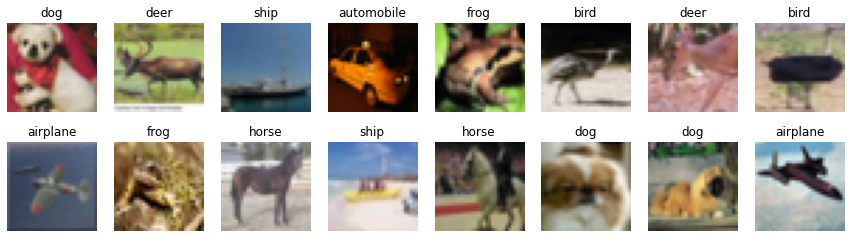

In [ ]:
#Show random images from train set
import numpy as np
cols = 8
rows = 2
fig = plt.figure(figsize=(2*cols-1, 2.5*rows-1))

for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(y_train))
    ax = fig.add_subplot(rows, cols, i*rows+j+1)
    ax.grid("off")
    ax.axis("off")
    ax.imshow(x_train[random_index, :])
    ax.set_title(cifar10_classes[y_train[random_index, 0]])

plt.show()


**Prepare Data**

In [ ]:
#Normalize inputs
x_train2 = (x_train/255) - 0.5
x_test2 = (x_test/255) - 0.5

#Convert class lables to one-hot encoded
y_train2 = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2 = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

In [ ]:
y_train2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

**Define CNN architecture**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras import activations

In [ ]:
def my_model():
  model = Sequential()
  model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same', activation=activations.relu))
  
  model.add(Conv2D(32, (3, 3), padding='same', activation=activations.relu))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(32, (3, 3), padding='same', activation=activations.relu))
  model.add(Conv2D(64, (3, 3), padding='same', activation=activations.relu))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation=activations.relu))
  
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  return model

In [ ]:
model = my_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                        

**Train Model**

In [ ]:
model.compile(loss='categorical_crossentropy', # untuk multi class classifcation
              optimizer='sgd', # optimizer -> update bobot
              metrics='accuracy' # evaluasi matrics
              )
checkpoint_filepath = '/content/best_model'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit(
    x_train2, y_train2, #prepared data
    batch_size = 50,
    epochs=5,
    validation_data=(x_test2, y_test2),
    shuffle=True,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/5
1000/1000 [==============================] - 17s 6ms/step - loss: 2.1795 - accuracy: 0.1881 - val_loss: 1.9244 - val_accuracy: 0.3159
Epoch 2/5
1000/1000 [==============================] - 5s 5ms/step - loss: 1.8541 - accuracy: 0.3327 - val_loss: 1.6233 - val_accuracy: 0.4219
Epoch 3/5
1000/1000 [==============================] - 5s 5ms/step - loss: 1.6536 - accuracy: 0.4022 - val_loss: 1.4896 - val_accuracy: 0.4627
Epoch 4/5
1000/1000 [==============================] - 5s 5ms/step - loss: 1.5463 - accuracy: 0.4389 - val_loss: 1.3998 - val_accuracy: 0.4958
Epoch 5/5
1000/1000 [==============================] - 5s 5ms/step - loss: 1.4599 - accuracy: 0.4717 - val_loss: 1.3227 - val_accuracy: 0.5281


In [ ]:
model.evaluate(x_test2, y_test2)

313/313 [==============================] - 2s 4ms/step - loss: 1.3227 - accuracy: 0.5281


[1.3227455615997314, 0.5281000137329102]

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
model.evaluate(x_test2, y_test2)

313/313 [==============================] - 1s 4ms/step - loss: 1.3227 - accuracy: 0.5281


[1.3227455615997314, 0.5281000137329102]

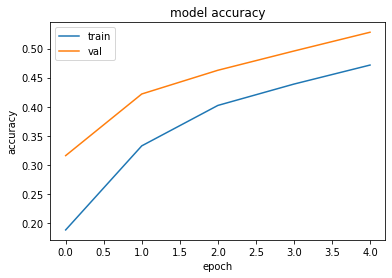

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

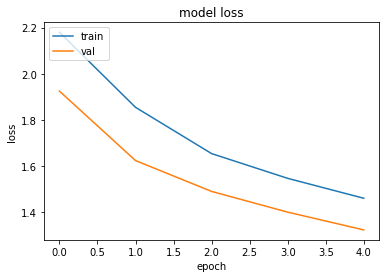

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Evaluate Model - Confusion Matrix**

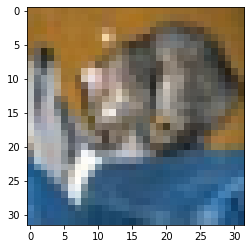

truth class cat


In [ ]:
x_test2[0].shape
img = np.expand_dims(x_test2[0], axis=0)

plt.imshow(x_test[0])
plt.show()

print("truth class", cifar10_classes[y_test[0][0]])

In [ ]:
#make test prediction
y_pred_test = model.predict(img)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

In [ ]:
y_pred_test_classes[0]

3

In [ ]:
y_pred_test[0]

array([0.02350253, 0.0236717 , 0.08445315, 0.3580334 , 0.06840362,
       0.18851174, 0.13177383, 0.04648819, 0.04796659, 0.02719523],
      dtype=float32)

In [ ]:
print("predicted class", cifar10_classes[y_pred_test_classes[0]])

predicted class cat


In [ ]:
#make test prediction
y_pred_test = model.predict(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

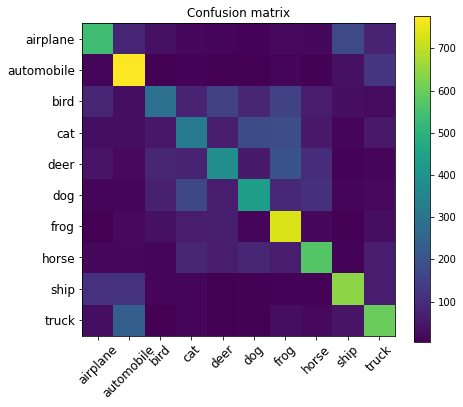

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

plt.figure(figsize=(7,6))
plt.title('Confusion matrix')
plt.imshow(confusion_matrix(y_test, y_pred_test_classes ))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)

plt.yticks(np.arange(10), cifar10_classes,  fontsize=12)
plt.colorbar()
plt.show()

In [ ]:
print("Test accuracy score", accuracy_score(y_test, y_pred_test_classes))

Test accuracy score 0.5281


**Transfer Learning**

In [ ]:
from keras.applications import vgg16, resnet

In [ ]:
#base model

base_model_1 = resnet.ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
base_model_1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
# lets add the final layers to our base model
model_1 = Sequential()
model_1.add(base_model_1)
model_1.add(Flatten())

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
#Add Dense Layer
model_1.add(Dense(256, activation=activations.relu))

model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24,114,826
Trainable params: 24,061,706
Non-trainable params: 53,120
_________________________________________________________________


**Train Model**

In [ ]:
model_1.compile(loss='categorical_crossentropy', # untuk multi class classifcation
              optimizer='sgd', # optimizer -> update bobot
              metrics='accuracy' # evaluasi matrics
              )
checkpoint_filepath = '/content/best_model_vgg'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model_1.fit(
    x_train2, y_train2, #prepared data
    batch_size = 50,
    epochs=5,
    validation_data=(x_test2, y_test2),
    shuffle=True,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/5
1000/1000 [==============================] - 52s 47ms/step - loss: 1.3385 - accuracy: 0.5555 - val_loss: 1.0111 - val_accuracy: 0.6558
Epoch 2/5
1000/1000 [==============================] - 44s 44ms/step - loss: 0.7751 - accuracy: 0.7422 - val_loss: 0.6710 - val_accuracy: 0.7734
Epoch 3/5
1000/1000 [==============================] - 44s 44ms/step - loss: 0.5902 - accuracy: 0.8031 - val_loss: 0.6139 - val_accuracy: 0.7958
Epoch 4/5
1000/1000 [==============================] - 44s 44ms/step - loss: 0.4591 - accuracy: 0.8469 - val_loss: 0.6184 - val_accuracy: 0.7948
Epoch 5/5
1000/1000 [==============================] - 44s 44ms/step - loss: 0.3565 - accuracy: 0.8812 - val_loss: 0.6327 - val_accuracy: 0.7989


In [ ]:
#pretrained model dari ImageNet dengan Arsiketur VGG16
model_1.evaluate(x_test2, y_test2)

313/313 [==============================] - 6s 15ms/step - loss: 0.6327 - accuracy: 0.7989


[0.6326876878738403, 0.7989000082015991]

In [ ]:
#model yang kita bangun sendiri
model.evaluate(x_test2, y_test2)

313/313 [==============================] - 1s 4ms/step - loss: 1.3227 - accuracy: 0.5281


[1.3227455615997314, 0.5281000137329102]